Vamos construir uma `rede neural` do zero para classificar números escritos a mão.  
Para isso, vamos utilizar o dataset `MNIST`, que é um dataset de imagens de números escritos a mão.  
O dataset possui 60.000 imagens para treino e 10.000 imagens para teste. Cada imagem possui tamanho 28x28 pixels.

In [23]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [24]:
# Importando o dataset
data = pd.read_csv('mnist.csv')

In [25]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [26]:
Y_train

array([9, 6, 6, ..., 4, 6, 3], dtype=int64)

In [27]:
# Definindo os parâmetros iniciais
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


# Definindo o ReLU: função de ativação
def ReLU(Z):
    return np.maximum(Z, 0)


# Definindo a função de ativação Softmax
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


# Definindo a propagação para frente
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):
    return Z > 0


# Definindo o one-hot encoding: transforma os valores de y em vetores de 0 e 1
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


# Definindo a propagação para trás
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


# Definindo a atualização dos parâmetros
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [28]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [30]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 0 3 ... 2 2 3] [9 6 6 ... 4 6 3]
0.08133333333333333
Iteration:  10
[1 0 3 ... 2 2 3] [9 6 6 ... 4 6 3]
0.14621739130434783
Iteration:  20
[3 0 6 ... 2 2 3] [9 6 6 ... 4 6 3]
0.21828985507246376
Iteration:  30
[3 0 6 ... 2 2 3] [9 6 6 ... 4 6 3]
0.28705797101449276
Iteration:  40
[3 0 0 ... 2 2 3] [9 6 6 ... 4 6 3]
0.3337391304347826
Iteration:  50
[3 0 0 ... 2 2 3] [9 6 6 ... 4 6 3]
0.3723623188405797
Iteration:  60
[9 0 0 ... 2 2 3] [9 6 6 ... 4 6 3]
0.41240579710144926
Iteration:  70
[9 0 0 ... 2 2 3] [9 6 6 ... 4 6 3]
0.45256521739130434
Iteration:  80
[9 0 0 ... 2 2 3] [9 6 6 ... 4 6 3]
0.4905797101449275
Iteration:  90
[9 0 0 ... 2 2 3] [9 6 6 ... 4 6 3]
0.5229855072463768
Iteration:  100
[9 6 6 ... 2 2 3] [9 6 6 ... 4 6 3]
0.5526376811594202
Iteration:  110
[9 6 6 ... 6 2 3] [9 6 6 ... 4 6 3]
0.5790144927536232
Iteration:  120
[9 6 6 ... 6 2 3] [9 6 6 ... 4 6 3]
0.6032028985507246
Iteration:  130
[9 6 6 ... 6 2 3] [9 6 6 ... 4 6 3]
0.6237826086956522
Iteration: 

In [31]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


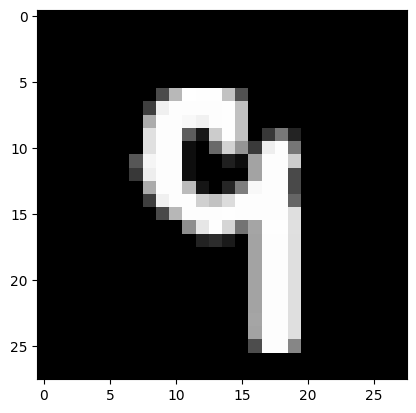

Prediction:  [6]
Label:  6


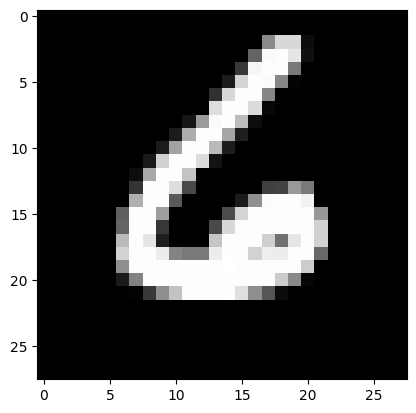

Prediction:  [6]
Label:  6


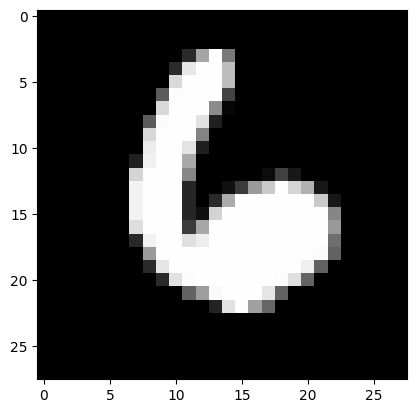

Prediction:  [9]
Label:  9


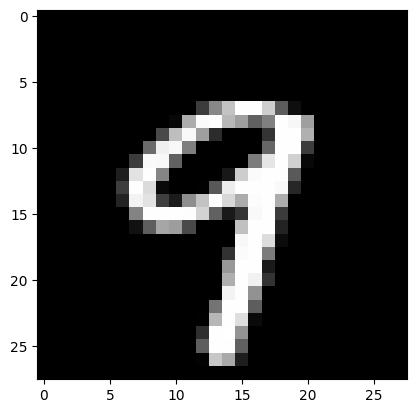

In [32]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [33]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 1 7 3 4 8 0 2 8 6 1 7 4 4 1 6 7 4 8 3 1 6 9 4 5 8 9 9 2 0 2 0 7 9 4 0 8
 4 9 8 1 8 0 7 7 0 4 4 9 2 7 0 7 6 1 0 4 0 6 0 3 4 1 5 9 7 6 9 9 9 6 4 2 0
 9 0 5 3 7 9 0 3 6 6 3 1 6 3 4 2 0 3 1 0 5 7 0 5 3 8 3 0 8 7 8 0 0 3 4 9 0
 7 3 9 1 2 4 1 1 6 8 3 4 1 1 5 0 2 3 4 2 6 1 6 7 7 8 8 2 3 2 3 2 2 3 5 1 5
 9 6 8 7 3 0 0 6 9 2 4 2 0 4 5 1 4 3 6 8 3 6 1 6 4 5 3 7 8 6 2 6 1 4 5 9 8
 7 9 8 0 4 3 2 7 7 7 1 5 4 3 0 9 0 4 7 9 0 7 4 4 0 4 5 5 2 9 9 7 6 0 6 9 7
 5 6 1 6 7 4 6 9 4 1 6 0 2 3 0 5 7 1 7 5 0 5 6 3 5 0 9 4 8 5 1 6 2 6 7 0 3
 9 3 9 5 1 0 1 3 9 4 1 7 3 0 1 1 9 4 1 5 0 0 9 2 5 4 7 4 6 0 6 5 7 7 0 3 2
 3 9 7 1 1 6 5 9 6 1 7 2 6 5 3 0 0 1 4 9 5 6 6 5 0 4 9 7 8 2 8 5 2 5 4 1 5
 1 7 8 0 9 8 6 9 6 8 7 1 3 9 9 6 0 0 2 2 4 7 1 6 3 7 5 1 6 2 3 0 2 0 3 1 2
 2 6 4 0 2 4 8 7 7 7 9 3 6 4 0 3 2 8 9 8 6 2 6 8 5 5 6 7 9 7 0 6 7 4 2 5 0
 2 6 7 2 3 1 0 8 7 2 6 2 0 6 1 1 7 8 6 4 0 2 9 1 6 8 3 4 3 3 6 4 7 7 7 0 1
 7 6 8 0 8 5 6 7 3 9 3 8 6 0 9 8 6 9 6 2 2 3 5 9 2 8 7 1 7 4 8 0 1 6 4 0 3
 7 7 2 4 0 9 4 4 8 1 3 5 

0.844